In [11]:
import csep
from csep.core import regions
from csep.utils import time_utils
import numpy as np

#Plot 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
from cartopy.io import img_tiles

In [12]:
# Set start and end time
start_time = time_utils.strptime_to_utc_datetime('2008-01-01 00:00:00.0')
end_time = time_utils.strptime_to_utc_datetime('2017-01-31 23:59:59.0')

# Magnitude bins properties
min_mw = 4.95
max_mw = 8.95
dmw = 0.1

# Create space and magnitude regions.
magnitudes = regions.magnitude_bins(min_mw, max_mw, dmw)

region_nz = regions.nz_csep_region()
region_italy = regions.italy_csep_region()



In [13]:
# Reading all catalog

# Read New Zealand catalog
nz_catalog = csep.query_gns(start_time, end_time,max_longitude=179.8)
nz_catalog = nz_catalog.filter('magnitude >= 4.95')
nz_catalog = nz_catalog.filter_spatial(region_nz)
print(f'\n\n this is the catalog *** {nz_catalog}')


# Read Italy catalog
italy_catalog = csep.query_bsi(start_time, end_time)
italy_catalog = italy_catalog.filter('magnitude >= 3.95')
italy_catalog = italy_catalog.filter_spatial(region_italy)
print(f'\n\n this is the catalog *** {italy_catalog}')


# Read gcmt catalog
gcmt_catalog = csep.query_gcmt(start_time, end_time)
gcmt_catalog = gcmt_catalog.filter('magnitude >= 4.95')
print(f'\n\n this is the catalog *** {gcmt_catalog}')

Downloaded catalog from GNS Science NZ (GNS) with following parameters
Start Date: 2008-01-01 06:36:23.100000+00:00
End Date: 2017-01-31 22:15:34.881000+00:00
Min Latitude: -46.99784 and Max Latitude: -34.04762268
Min Longitude: 164.44528 and Max Longitude: 179.79857
Min Magnitude: 2.95
Found 19236 events in the gns catalog.


 this is the catalog *** 
        Name: None

        Start Date: 2008-01-20 18:41:49.391000+00:00
        End Date: 2017-01-22 21:00:16.519000+00:00

        Latitude: (-46.32062086, -37.35430527)
        Longitude: (165.8346863, 178.8164825)

        Min Mw: 4.95
        Max Mw: 7.820379733

        Event Count: 213
        
Fetched BSI catalog in 63.884485483169556 seconds.

Downloaded catalog from Bollettino Sismico Italiano (BSI) with following parameters
Start Date: 2008-01-01 04:18:11.050000+00:00
End Date: 2017-01-30 21:33:33.920000+00:00
Min Latitude: 32.6 and Max Latitude: 48.8
Min Longitude: 3.13 and Max Longitude: 21.0
Min Magnitude: 2.5
Found 12019 e

In [14]:
def _get_basemap(basemap):

    if basemap == 'stamen_terrain':
        tiles = img_tiles.Stamen('terrain')
    elif basemap == 'stamen_terrain-background':
        tiles = img_tiles.Stamen('terrain-background')
    elif basemap == 'google-satellite':
        tiles = img_tiles.GoogleTiles(style='satellite')
    elif basemap == 'ESRI_terrain':
        webservice = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/'                  'MapServer/tile/{z}/{y}/{x}.jpg'
        tiles = img_tiles.GoogleTiles(url=webservice)
    elif basemap == 'ESRI_imagery':
        webservice = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/'                  'MapServer/tile/{z}/{y}/{x}.jpg'
        tiles = img_tiles.GoogleTiles(url=webservice)
    elif basemap == 'ESRI_relief':
        webservice = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/'                  'MapServer/tile/{z}/{y}/{x}.jpg'
        tiles = img_tiles.GoogleTiles(url=webservice)
    elif basemap == 'ESRI_topo':
        webservice = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/'                  'MapServer/tile/{z}/{y}/{x}.jpg'
        tiles = img_tiles.GoogleTiles(url=webservice)
    else:
        raise ValueError('Basemap type not valid or not implemented')

    return tiles


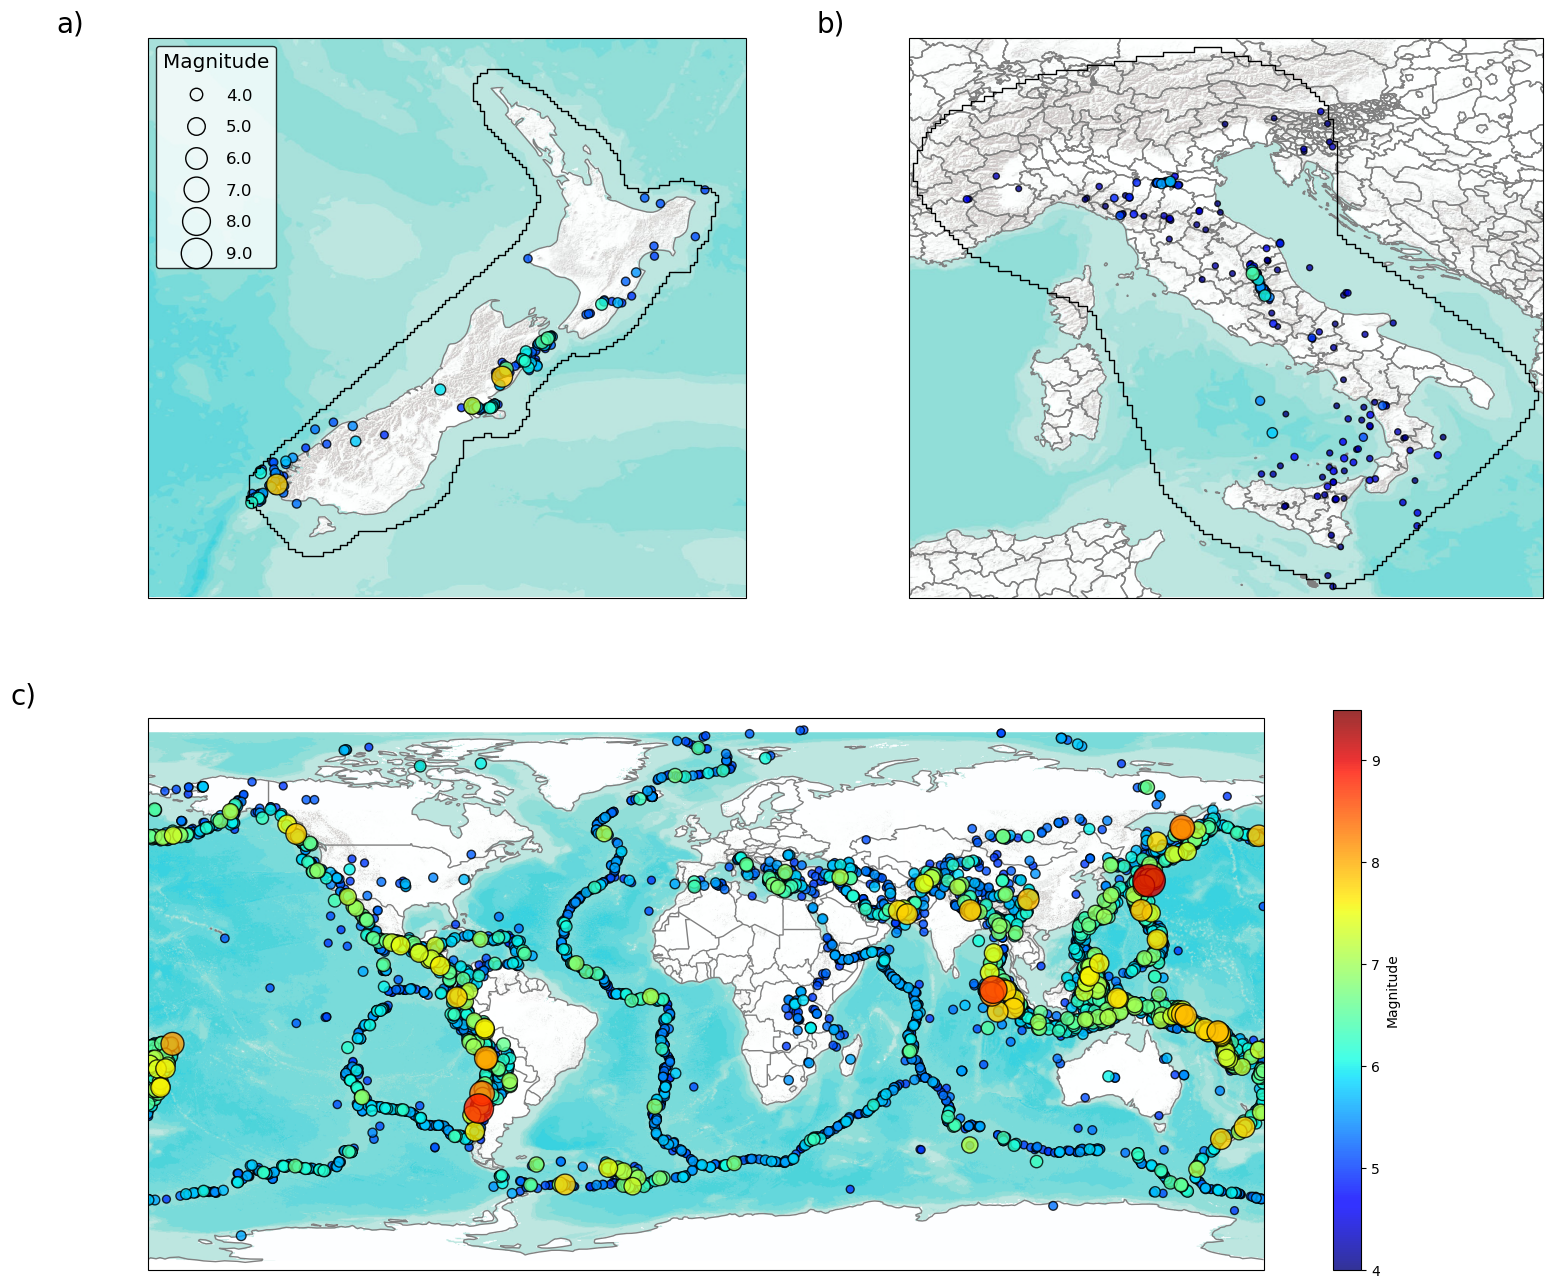

In [15]:

fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,2)
fig.tight_layout()
cmap = 'jet'

# Sort the catalog by magnitude
gcmt_catalog = np.sort(gcmt_catalog.data, order=['magnitude']) 
nz_catalog = np.sort(nz_catalog.data, order=['magnitude']) 
italy_catalog = np.sort(italy_catalog.data, order=['magnitude']) 

ax_NZ = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(), adjustable='datalim')
ax_NZ.add_feature(cartopy.feature.COASTLINE, edgecolor='grey', linewidth=1)
ax_NZ.add_feature(cartopy.feature.BORDERS, edgecolor='grey', linewidth=1)
ax_NZ.add_image(_get_basemap('ESRI_terrain'), 6)
gl = ax_NZ.gridlines()
gl.xlines = False
gl.ylines = False
gl.xlabels_top = False 
gl.xlabels_bottom = True 
gl.ylabels_right = False
gl.ylabels_left = True
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
# gl.xlocator = mticker.FixedLocator([165,170, 174, 179])
gl.xformatter = LONGITUDE_FORMATTER
# gl.ylocator = mticker.FixedLocator([-33, -38, -41, -44, -48])
gl.yformatter = LATITUDE_FORMATTER


scatter_NZ = ax_NZ.scatter(nz_catalog['longitude'], 
                           nz_catalog['latitude'], 
                           s = 1*2**(nz_catalog['magnitude']), 
                           c = nz_catalog['magnitude'],
                           edgecolors= 'black', 
                           vmin = 4, 
                           facecolor="None", 
                           vmax = 9.5, 
                           alpha =0.8, 
                           linewidth=1, 
                           marker='o', 
                           cmap = cmap,
                           zorder=2)

ptsNZ= region_nz.tight_bbox()
ax_NZ.plot(ptsNZ[:,0], ptsNZ[:,1], lw=1, color='black')

ax_NZ.set_xlim(164,179.9)
ax_NZ.set_ylim(-49,-33)


ax_IT = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree(), adjustable='datalim')
ax_IT.add_feature(cartopy.feature.STATES, facecolor='None', edgecolor='grey', linewidth=1)
ax_IT.add_image(_get_basemap('ESRI_terrain'), 6)
gl = ax_IT.gridlines()
gl.xlines = False
gl.ylines = False
gl.xlabels_top = False 
gl.xlabels_bottom = True 
gl.ylabels_right = False
gl.ylabels_left = True
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
# gl.xlocator = mticker.FixedLocator([6, 10, 14, 18])
gl.xformatter = LONGITUDE_FORMATTER
# gl.ylocator = mticker.FixedLocator([36, 38, 40, 42, 44, 46, 48])
gl.yformatter = LATITUDE_FORMATTER



scatter_IT = ax_IT.scatter(italy_catalog['longitude'], 
                           italy_catalog['latitude'], 
                           s = 1*2**(italy_catalog['magnitude']), 
                           c = italy_catalog['magnitude'],
                           edgecolors= 'black', 
                           vmin = 4, 
                           facecolor="None", 
                           vmax = 9.5, 
                           alpha =0.8, 
                           linewidth=1, 
                           marker='o', 
                           cmap = cmap, 
                           zorder=2)
    

ptsIT= region_italy.tight_bbox()
ax_IT.plot(ptsIT[:,0], ptsIT[:,1], lw=1, color='black')

ax_IT.set_xlim(5.4,19.6)
ax_IT.set_ylim(35.7,48)



ax_gcmt = fig.add_subplot(gs[1, :], projection=ccrs.PlateCarree(), adjustable='datalim')
ax_gcmt.add_feature(cartopy.feature.COASTLINE, edgecolor='grey', linewidth=1)
ax_gcmt.add_feature(cartopy.feature.BORDERS, edgecolor='grey', linewidth=1)
ax_gcmt.add_image(_get_basemap('ESRI_terrain'), 6)
gl = ax_gcmt.gridlines()
gl.xlines = False
gl.ylines = False
gl.xlabels_top = False 
gl.xlabels_bottom = True 
gl.ylabels_right = False
gl.ylabels_left = True
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
# gl.xlocator = mticker.FixedLocator([165,170, 174, 179])
gl.xformatter = LONGITUDE_FORMATTER
# gl.ylocator = mticker.FixedLocator([-33, -38, -41, -44, -48])
gl.yformatter = LATITUDE_FORMATTER



scatter_gcmt= ax_gcmt.scatter(gcmt_catalog['longitude'], 
                              gcmt_catalog['latitude'], 
                              s = 1*2**(gcmt_catalog['magnitude']), 
                              c = gcmt_catalog['magnitude'],
                              edgecolors= 'black', 
                              vmin = 4, 
                              facecolor="None", 
                              vmax = 9.5, 
                              alpha =0.8, 
                              linewidth=1, 
                              marker='o', 
                              cmap = cmap, 
                              zorder=2)


ax_NZ.text(-0.1, 1.05, 'a)', transform=ax_NZ.transAxes, fontsize=20,  va='top', ha='right')
ax_IT.text(-0.1, 1.05, 'b)', transform=ax_IT.transAxes, fontsize=20,  va='top', ha='right')
ax_gcmt.text(-0.1, 1.05, 'c)', transform=ax_gcmt.transAxes, fontsize=20,  va='top', ha='right')


handles, labels = scatter_gcmt.legend_elements(prop="sizes", 
                                               num=7, 
                                               markerfacecolor="None", 
                                               markeredgecolor='black', 
                                               alpha=1, 
                                               zorder=1
                                               )
legendC = ax_NZ.legend(handles, 
                       ['4.0', '5.0', '6.0', '7.0', '8.0', '9.0'], 
                       loc="upper left",
                       edgecolor='black',
                       labelspacing=1,
                    #    framealpha=0.5,
                       fontsize=12,
                       facecolor='white'
                       )

legendC.set_title('Magnitude',
                  prop={'size':'x-large'}
                  )
cbar = plt.colorbar(scatter_gcmt)
cbar.set_label('Magnitude')


plt.savefig('../output/figure1.png', 
            dpi=150, 
            bbox_inches = 'tight')